# Support Vector Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create a linear data set

In [2]:
from sklearn.datasets import make_blobs

X,y= make_blobs(n_samples=500,centers=2,random_state=20)
X

array([[ 6.05487413e+00,  4.83917799e+00],
       [ 3.30025999e+00,  6.92264204e+00],
       [ 5.51231580e+00,  5.37854819e+00],
       [ 6.69042999e+00,  6.42759884e+00],
       [ 2.29034449e+00,  8.11011278e+00],
       [ 2.43925569e+00,  8.78538034e+00],
       [ 7.46559415e+00,  6.01476085e+00],
       [ 7.50098576e+00,  4.98996139e+00],
       [ 8.17041088e+00,  4.56323138e+00],
       [ 7.58527327e+00,  7.73963658e+00],
       [ 8.39610912e+00,  6.12838910e+00],
       [ 1.49704227e+00,  6.91368146e+00],
       [ 1.65394605e+00,  9.87490521e+00],
       [ 8.04398719e+00,  8.61892674e+00],
       [ 2.11618757e+00,  8.74298179e+00],
       [ 7.98001100e+00,  4.88780791e+00],
       [-1.78650270e-01,  8.29570927e+00],
       [ 7.73680293e+00,  5.90731969e+00],
       [ 2.23353713e+00,  9.60175963e+00],
       [ 1.54718391e+00,  7.36395988e+00],
       [ 6.89553922e+00,  6.53750691e+00],
       [ 7.30778179e+00,  4.93063640e+00],
       [ 1.86140464e+00,  7.72595353e+00],
       [ 7.

In [3]:
y

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,

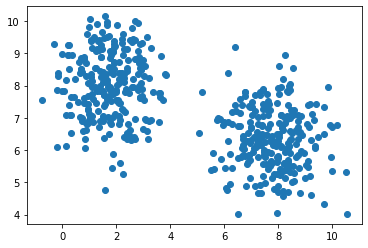

In [4]:
plt.scatter(X[:,0],X[:,1]);

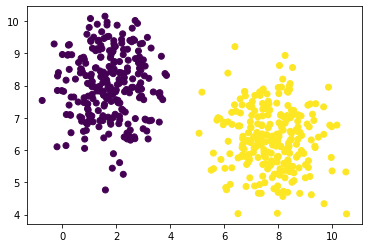

In [5]:
plt.scatter(X[:,0],X[:,1],c=y);

## SVC - Linear

In [6]:
from sklearn.svm import SVC
svc_lin=SVC(kernel='linear')
svc_lin=svc_lin.fit(X,y)

In [7]:
svc_lin

SVC(kernel='linear')

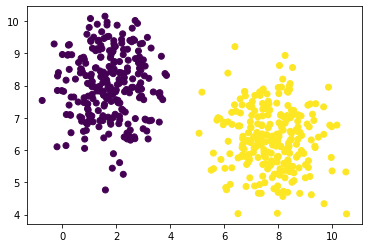

In [8]:
plt.scatter(X[:,0],X[:,1],c=y)


In [9]:
# Plotting the surface

def plot_SVC_surface(model):
    
    # Identifying Axis

    ax=plt.gca()

    x_lim=ax.get_xlim() 
    y_lim=ax.get_ylim()

   

    # Creating a collection of x and y values wihtin this range

    xx=np.linspace(x_lim[0],x_lim[1],50)
    yy=np.linspace(y_lim[0],y_lim[1],50)
    
    # Creating a meshgrid using these xx and yy

    XX,YY=np.meshgrid(xx,yy) 

    # Creatign a stack of these

    xy=np.vstack([XX.ravel(),YY.ravel()]).T



    # Creating decision boundary using these values

    Z=model.decision_function(xy).reshape(XX.shape)
    

    ax.contour(XX, YY, Z,colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '--'])

    # plotting  support vectors obtained 
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=200,
               linewidth=1, facecolors='none', edgecolors='none')
    plt.show()

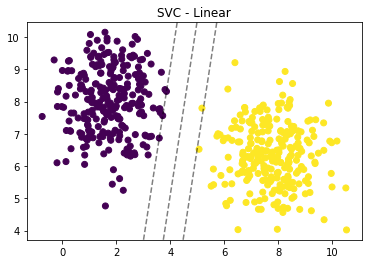

In [10]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Linear')
plot_SVC_surface(svc_lin);

### Regularisation parameter C

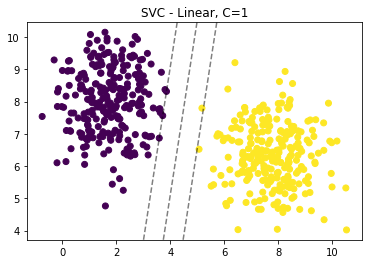

In [12]:
svc_lin=SVC(kernel='linear',C=1)
svc_lin=svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Linear, C=1')
plot_SVC_surface(svc_lin);

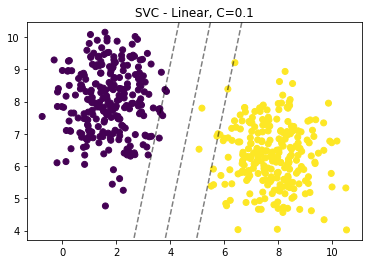

In [13]:
svc_lin=SVC(kernel='linear',C=0.1)
svc_lin=svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Linear, C=0.1')
plot_SVC_surface(svc_lin);

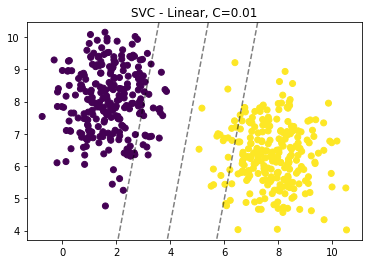

In [14]:
svc_lin=SVC(kernel='linear',C=0.01)
svc_lin=svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Linear, C=0.01')
plot_SVC_surface(svc_lin);

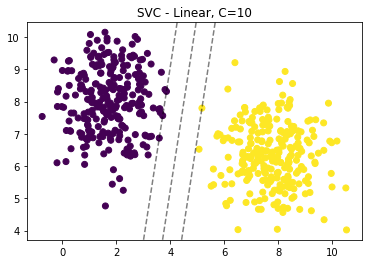

In [15]:
svc_lin=SVC(kernel='linear',C=10)
svc_lin=svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Linear, C=10')
plot_SVC_surface(svc_lin);

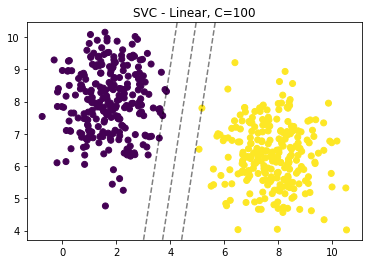

In [16]:
svc_lin=SVC(kernel='linear',C=100)
svc_lin=svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Linear, C=100')
plot_SVC_surface(svc_lin);

## Creating non-linear dataset

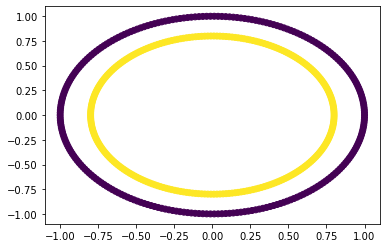

In [17]:
from sklearn.datasets import make_circles

X,y=make_circles(n_samples=500,random_state=20)
plt.scatter(X[:,0],X[:,1],c=y);

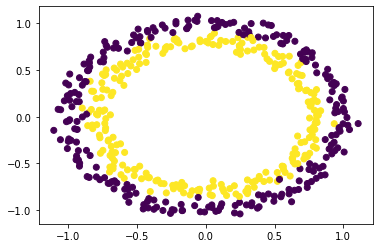

In [18]:
X,y=make_circles(n_samples=500,random_state=20,noise=0.05)
plt.scatter(X[:,0],X[:,1],c=y);

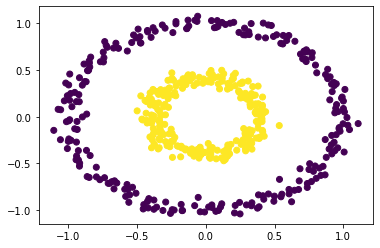

In [19]:
X,y=make_circles(n_samples=500,random_state=20,
                 noise=0.05,factor=0.4)
plt.scatter(X[:,0],X[:,1],c=y);

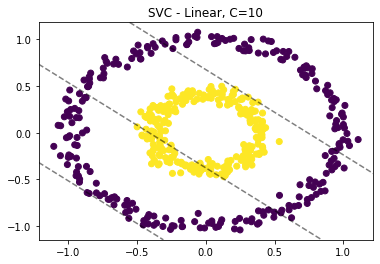

In [23]:
svc_lin=SVC(kernel='linear',C=10)
svc_lin=svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Linear, C=10')
plot_SVC_surface(svc_lin);

## Non-linear kernels

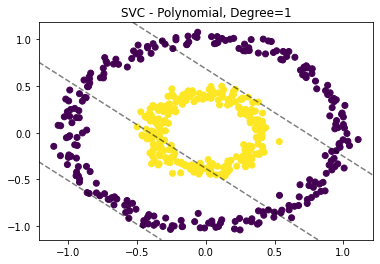

In [24]:
svc_poly=SVC(kernel='poly',degree=1)
svc_poly=svc_poly.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Polynomial, Degree=1')
plot_SVC_surface(svc_poly);

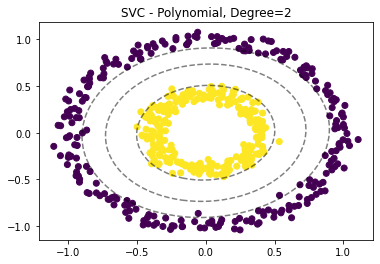

In [25]:
svc_poly=SVC(kernel='poly',degree=2)
svc_poly=svc_poly.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Polynomial, Degree=2')
plot_SVC_surface(svc_poly);

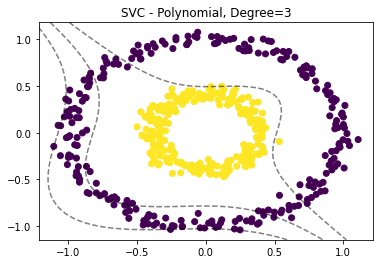

In [26]:
svc_poly=SVC(kernel='poly',degree=3)
svc_poly=svc_poly.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Polynomial, Degree=3')
plot_SVC_surface(svc_poly);

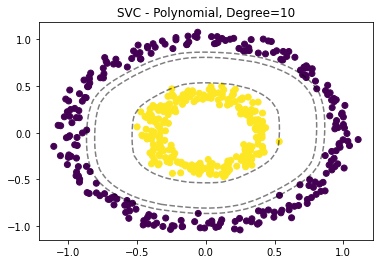

In [27]:
svc_poly=SVC(kernel='poly',degree=10)
svc_poly=svc_poly.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Polynomial, Degree=10')
plot_SVC_surface(svc_poly);

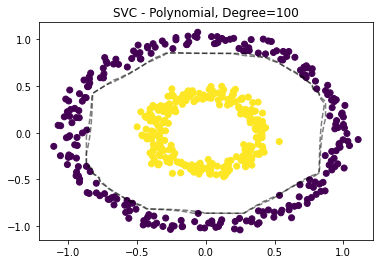

In [28]:
svc_poly=SVC(kernel='poly',degree=100)
svc_poly=svc_poly.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Polynomial, Degree=100')
plot_SVC_surface(svc_poly);

### kernel = sigmoid

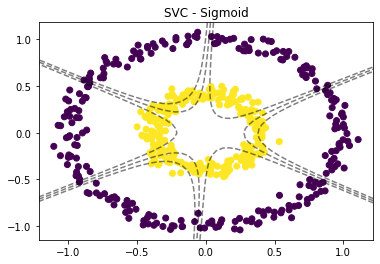

In [29]:
svc_sig=SVC(kernel='sigmoid')
svc_sig=svc_sig.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Sigmoid')
plot_SVC_surface(svc_sig);

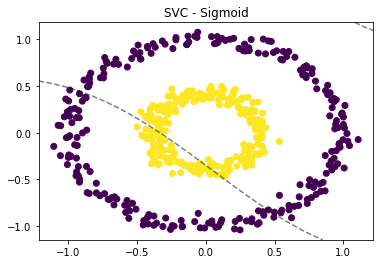

In [30]:
svc_sig=SVC(kernel='sigmoid',gamma=0.5)
svc_sig=svc_sig.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Sigmoid')
plot_SVC_surface(svc_sig);

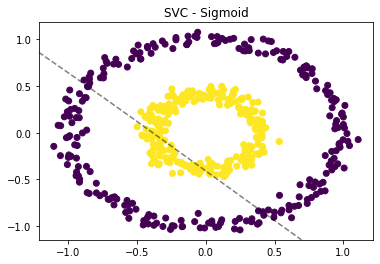

In [31]:
svc_sig=SVC(kernel='sigmoid',gamma=0.1)
svc_sig=svc_sig.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Sigmoid')
plot_SVC_surface(svc_sig);

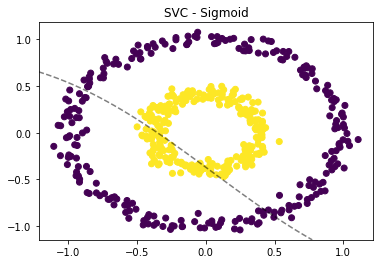

In [32]:
svc_sig=SVC(kernel='sigmoid',gamma=0.4)
svc_sig=svc_sig.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Sigmoid')
plot_SVC_surface(svc_sig);

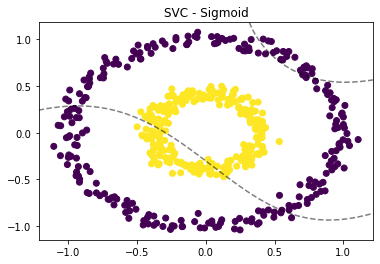

In [33]:
svc_sig=SVC(kernel='sigmoid',gamma=0.8)
svc_sig=svc_sig.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Sigmoid')
plot_SVC_surface(svc_sig);

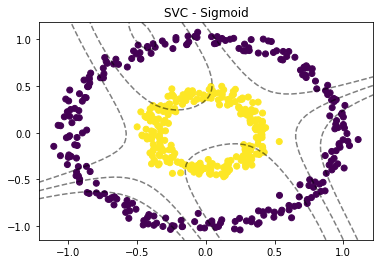

In [34]:
svc_sig=SVC(kernel='sigmoid',gamma=0.9)
svc_sig=svc_sig.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Sigmoid')
plot_SVC_surface(svc_sig);

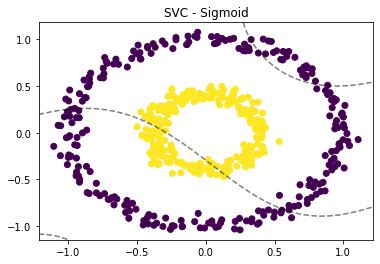

In [35]:
svc_sig=SVC(kernel='sigmoid',gamma=0.85)
svc_sig=svc_sig.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Sigmoid')
plot_SVC_surface(svc_sig);

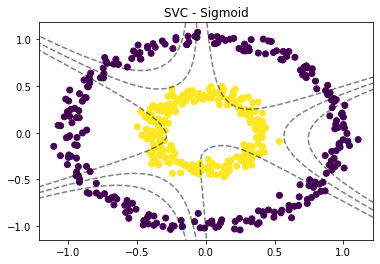

In [36]:
svc_sig=SVC(kernel='sigmoid',gamma=0.95)
svc_sig=svc_sig.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Sigmoid')
plot_SVC_surface(svc_sig);

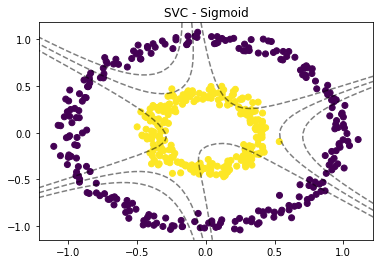

In [37]:
svc_sig=SVC(kernel='sigmoid',gamma=1)
svc_sig=svc_sig.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - Sigmoid')
plot_SVC_surface(svc_sig);

## kernel = rbf

### Radial Basis Function

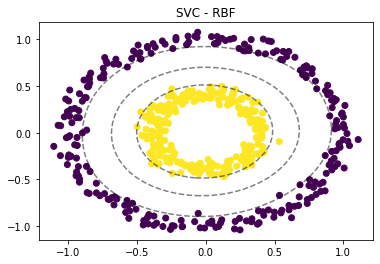

In [38]:
svc_rbf=SVC(kernel='rbf')
svc_rbf=svc_rbf.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - RBF')
plot_SVC_surface(svc_rbf);

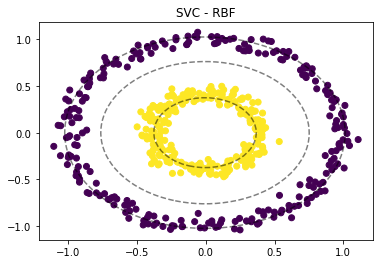

In [39]:
svc_rbf=SVC(kernel='rbf',gamma=0.1)
svc_rbf=svc_rbf.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - RBF')
plot_SVC_surface(svc_rbf);

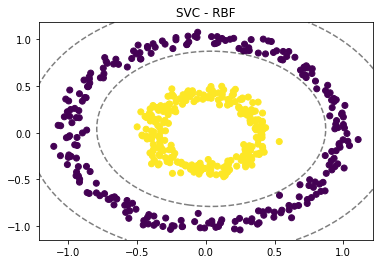

In [40]:
svc_rbf=SVC(kernel='rbf',gamma=0.05)
svc_rbf=svc_rbf.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - RBF')
plot_SVC_surface(svc_rbf);

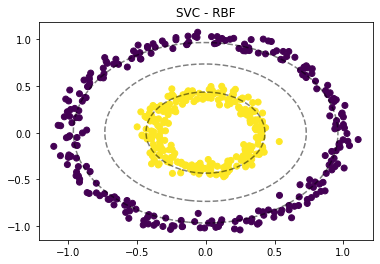

In [41]:
svc_rbf=SVC(kernel='rbf',gamma=.2)
svc_rbf=svc_rbf.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - RBF')
plot_SVC_surface(svc_rbf);

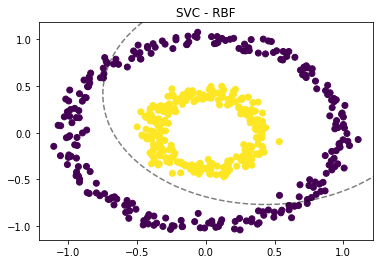

In [42]:
svc_rbf=SVC(kernel='rbf',gamma=0.005)
svc_rbf=svc_rbf.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC - RBF')
plot_SVC_surface(svc_rbf);

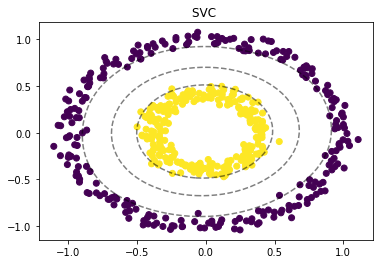

In [43]:
svc=SVC()
svc=svc.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC ')
plot_SVC_surface(svc);